# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_Disney+_1.csv")
df.head()

,userName,score,at,content
0,motv,1,2024-05-07 23:45:40,"Fitur PiPnya sempat error, jadi tidak bisa non..."
1,io Sulaiman,2,2024-05-07 21:55:44,Halo Disney kualitas udah di naikin kenapa tet...
2,Wilson bagas,2,2024-05-07 16:46:38,Tolong harga langganan perbulan di diskon sepe...
3,Rendy Ryphen,1,2024-05-07 15:25:41,"Aplikasi jelek, gak bisa terima kode otp, lalu..."
4,Nur Subrata,1,2024-05-07 14:31:20,Berlangganan bayar tapi filemnya gak bisa di t...


In [3]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,"Fitur PiPnya sempat error, jadi tidak bisa non...",motv,2024-05-07 23:45:40
1,Halo Disney kualitas udah di naikin kenapa tet...,io Sulaiman,2024-05-07 21:55:44
2,Tolong harga langganan perbulan di diskon sepe...,Wilson bagas,2024-05-07 16:46:38
3,"Aplikasi jelek, gak bisa terima kode otp, lalu...",Rendy Ryphen,2024-05-07 15:25:41
4,Berlangganan bayar tapi filemnya gak bisa di t...,Nur Subrata,2024-05-07 14:31:20
...,...,...,...
194,Sangat penting buat kami,Deden Samsudin,2024-04-14 00:31:50
195,"Memuaskan, terimakasih developer",lison enumbi,2024-04-13 20:00:07
196,"It's pricey now. Back then, i heard only coste...",dinarBalqis,2024-04-13 19:55:13
197,Harga berlangganan terlalu mahal,Muhammad Arifin,2024-04-13 18:20:09


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   199 non-null    object
 1   userName  199 non-null    object
 2   at        199 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,199,199,199
unique,197,199,199
top,Good,motv,2024-05-07 23:45:40
freq,2,1,1


# **Cleaning Data**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(199, 3)

In [7]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong
df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
df.shape

(197, 3)

In [12]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [13]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,fitur pipnya sempat error jadi tidak bisa nont...,motv,2024-05-07 23:45:40
1,halo disney kualitas udah di naikin kenapa tet...,io Sulaiman,2024-05-07 21:55:44
2,tolong harga langganan perbulan di diskon sepe...,Wilson bagas,2024-05-07 16:46:38
3,aplikasi jelek gak bisa terima kode otp lalu k...,Rendy Ryphen,2024-05-07 15:25:41
4,berlangganan bayar tapi filemnya gak bisa di t...,Nur Subrata,2024-05-07 14:31:20
...,...,...,...
194,sangat penting buat kami,Deden Samsudin,2024-04-14 00:31:50
195,memuaskan terimakasih developer,lison enumbi,2024-04-13 20:00:07
196,its pricey now back then i heard only costed f...,dinarBalqis,2024-04-13 19:55:13
197,harga berlangganan terlalu mahal,Muhammad Arifin,2024-04-13 18:20:09


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [15]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,fitur pipnya sempat error jadi tidak bisa nont...,motv,2024-05-07 23:45:40
1,halo disney kualitas udah di naikin kenapa tet...,io Sulaiman,2024-05-07 21:55:44
2,tolong harga langganan perbulan di diskon sepe...,Wilson bagas,2024-05-07 16:46:38
3,aplikasi jelek tidak bisa terima kode otp lalu...,Rendy Ryphen,2024-05-07 15:25:41
4,berlangganan bayar tapi filemnya tidak bisa di...,Nur Subrata,2024-05-07 14:31:20
...,...,...,...
194,sangat penting buat kami,Deden Samsudin,2024-04-14 00:31:50
195,memuaskan terimakasih developer,lison enumbi,2024-04-13 20:00:07
196,its pricey now back then i heard only costed f...,dinarBalqis,2024-04-13 19:55:13
197,harga berlangganan terlalu mahal,Muhammad Arifin,2024-04-13 18:20:09


In [16]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


In [17]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,fitur pipnya sempat error jadi bisa nonton meg...,motv,2024-05-07 23:45:40
1,halo disney kualitas udah naikin tetep naik pa...,io Sulaiman,2024-05-07 21:55:44
2,harga langganan perbulan diskon dulu kalau mas...,Wilson bagas,2024-05-07 16:46:38
3,aplikasi jelek bisa terima kode otp lalu kirim...,Rendy Ryphen,2024-05-07 15:25:41
4,berlangganan bayar filemnya bisa tonton,Nur Subrata,2024-05-07 14:31:20
...,...,...,...
194,sangat penting buat,Deden Samsudin,2024-04-14 00:31:50
195,memuaskan terimakasih developer,lison enumbi,2024-04-13 20:00:07
196,its pricey now back then i heard only costed f...,dinarBalqis,2024-04-13 19:55:13
197,harga berlangganan terlalu mahal,Muhammad Arifin,2024-04-13 18:20:09


In [18]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0      [fitur, pipnya, sempat, error, jadi, bisa, non...
1      [halo, disney, kualitas, udah, naikin, tetep, ...
2      [harga, langganan, perbulan, diskon, dulu, kal...
3      [aplikasi, jelek, bisa, terima, kode, otp, lal...
4          [berlangganan, bayar, filemnya, bisa, tonton]
                             ...                        
194                              [sangat, penting, buat]
195                  [memuaskan, terimakasih, developer]
196    [its, pricey, now, back, then, i, heard, only,...
197                [harga, berlangganan, terlalu, mahal]
198             [film, bisa, diputar, lancar, lewat, tv]
Name: content, Length: 197, dtype: object

In [19]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Disney+_1.csv', index = False)


In [20]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Disney+_1.csv', encoding = 'latin1')
df_clean

,content
0,fitur pipnya sempat error jadi bisa nonton meg...
1,halo disney kualitas udah naikin tetep naik pa...
2,harga langgan bulan diskon dulu kalau masuk da...
3,aplikasi jelek bisa terima kode otp lalu kirim...
4,langgan bayar filemnya bisa tonton
...,...
192,sangat penting buat
193,muas terimakasih developer
194,its pricey now back then i heard only costed f...
195,harga langgan terlalu mahal


# **Translate**

In [21]:
# Menginstall Library easynmt
!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

In [22]:
import pandas as pd
from easynmt import EasyNMT

In [23]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Disney+_1.csv', encoding='latin1')

In [24]:
source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [25]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 4.74MB/s]                   


In [26]:
df2 = df_clean.fillna(method = 'pad')
df2

,content
0,fitur pipnya sempat error jadi bisa nonton meg...
1,halo disney kualitas udah naikin tetep naik pa...
2,harga langgan bulan diskon dulu kalau masuk da...
3,aplikasi jelek bisa terima kode otp lalu kirim...
4,langgan bayar filemnya bisa tonton
...,...
192,sangat penting buat
193,muas terimakasih developer
194,its pricey now back then i heard only costed f...
195,harga langgan terlalu mahal


In [27]:
df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Disney+_1.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [28]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Disney+_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,fitur pipnya sempat error jadi bisa nonton meg...,The pipe feature had an error so it could watc...
1,1,halo disney kualitas udah naikin tetep naik pa...,"fontcolor="" # FFFF00""Hellodisneythe qualitykee..."
2,2,harga langgan bulan diskon dulu kalau masuk da...,The price of the month's discount is in the or...
3,3,aplikasi jelek bisa terima kode otp lalu kirim...,Bad application can receive code and then send...
4,4,langgan bayar filemnya bisa tonton,The pay-per-view movie can watch.
...,...,...,...
192,192,sangat penting buat,It's very important.
193,193,muas terimakasih developer,"Mussels. Thank you, developer."
194,194,its pricey now back then i heard only costed f...,its pricey now back then i heard only costed f...
195,195,harga langgan terlalu mahal,The price is too high.


# **Labeling**

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Disney+_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,fitur pipnya sempat error jadi bisa nonton meg...,The pipe feature had an error so it could watc...
1,1,halo disney kualitas udah naikin tetep naik pa...,"fontcolor="" # FFFF00""Hellodisneythe qualitykee..."
2,2,harga langgan bulan diskon dulu kalau masuk da...,The price of the month's discount is in the or...
3,3,aplikasi jelek bisa terima kode otp lalu kirim...,Bad application can receive code and then send...
4,4,langgan bayar filemnya bisa tonton,The pay-per-view movie can watch.
...,...,...,...
192,192,sangat penting buat,It's very important.
193,193,muas terimakasih developer,"Mussels. Thank you, developer."
194,194,its pricey now back then i heard only costed f...,its pricey now back then i heard only costed f...
195,195,harga langgan terlalu mahal,The price is too high.


In [ ]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [38]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 60
Netral = 95
Negatif = 42

Total Data Seluruhnya : 197


In [36]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,fitur pipnya sempat error jadi bisa nonton meg...,The pipe feature had an error so it could watc...,Netral
1,1,halo disney kualitas udah naikin tetep naik pa...,"fontcolor="" # FFFF00""Hellodisneythe qualitykee...",Netral
2,2,harga langgan bulan diskon dulu kalau masuk da...,The price of the month's discount is in the or...,Positif
3,3,aplikasi jelek bisa terima kode otp lalu kirim...,Bad application can receive code and then send...,Negatif
4,4,langgan bayar filemnya bisa tonton,The pay-per-view movie can watch.,Netral
...,...,...,...,...
192,192,sangat penting buat,It's very important.,Positif
193,193,muas terimakasih developer,"Mussels. Thank you, developer.",Netral
194,194,its pricey now back then i heard only costed f...,its pricey now back then i heard only costed f...,Positif
195,195,harga langgan terlalu mahal,The price is too high.,Positif


In [37]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,fitur pipnya sempat error jadi bisa nonton meg...,The pipe feature had an error so it could watc...,Netral
1,halo disney kualitas udah naikin tetep naik pa...,"fontcolor="" # FFFF00""Hellodisneythe qualitykee...",Netral
2,harga langgan bulan diskon dulu kalau masuk da...,The price of the month's discount is in the or...,Positif
3,aplikasi jelek bisa terima kode otp lalu kirim...,Bad application can receive code and then send...,Negatif
4,langgan bayar filemnya bisa tonton,The pay-per-view movie can watch.,Netral
...,...,...,...
192,sangat penting buat,It's very important.,Positif
193,muas terimakasih developer,"Mussels. Thank you, developer.",Netral
194,its pricey now back then i heard only costed f...,its pricey now back then i heard only costed f...,Positif
195,harga langgan terlalu mahal,The price is too high.,Positif


# **Visualisasi**


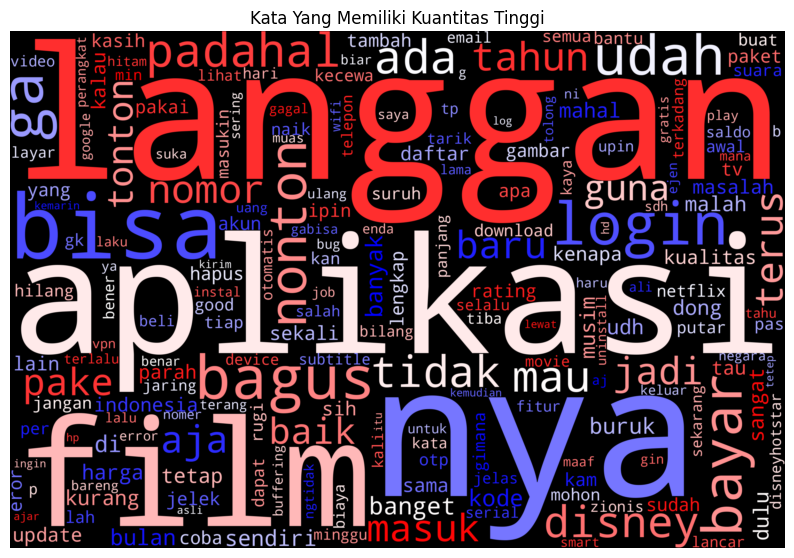

In [39]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


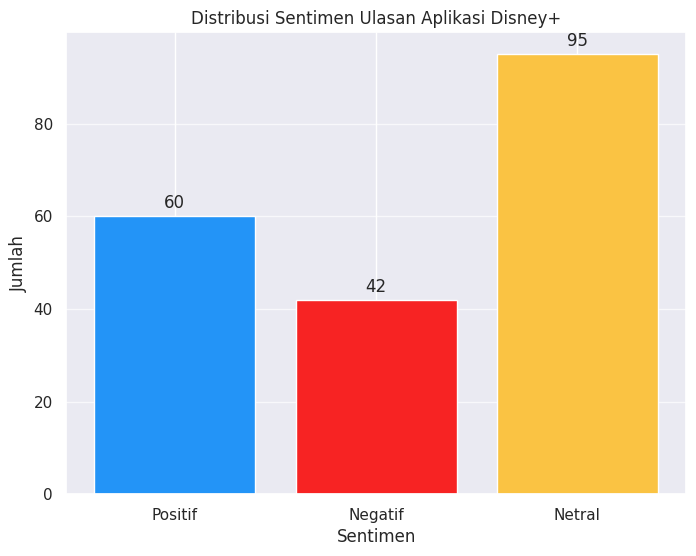

In [40]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Disney+")


In [41]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
2,harga langgan bulan diskon dulu kalau masuk da...,The price of the month's discount is in the or...,Positif
3,aplikasi jelek bisa terima kode otp lalu kirim...,Bad application can receive code and then send...,Negatif
5,kurang ajar panjang langgan tahun lewat kartu ...,Insolently long years of credit card practice ...,Negatif
6,rusak,broken,Negatif
7,bagus sekalisangking bagus ny gk amsuk,Very nice. Nice. Mrs. Amsuk.,Positif
...,...,...,...
190,kurang komplit,missing complete,Negatif
191,susah masukin no nyapdhal wifi udh bagusdata s...,It's hard to enter no nupdhal wifi udh good mo...,Positif
192,sangat penting buat,It's very important.,Positif
194,its pricey now back then i heard only costed f...,its pricey now back then i heard only costed f...,Positif


In [42]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
2,harga langgan bulan diskon dulu kalau masuk da...,The price of the month's discount is in the or...,1
3,aplikasi jelek bisa terima kode otp lalu kirim...,Bad application can receive code and then send...,0
5,kurang ajar panjang langgan tahun lewat kartu ...,Insolently long years of credit card practice ...,0
6,rusak,broken,0
7,bagus sekalisangking bagus ny gk amsuk,Very nice. Nice. Mrs. Amsuk.,1
...,...,...,...
190,kurang komplit,missing complete,0
191,susah masukin no nyapdhal wifi udh bagusdata s...,It's hard to enter no nupdhal wifi udh good mo...,1
192,sangat penting buat,It's very important.,1
194,its pricey now back then i heard only costed f...,its pricey now back then i heard only costed f...,1


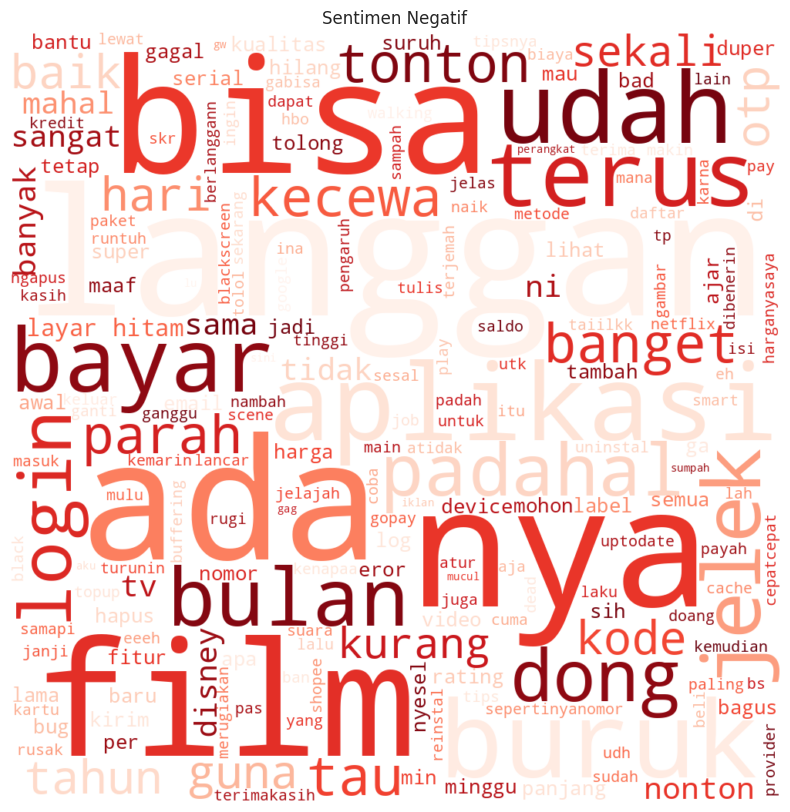

In [43]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

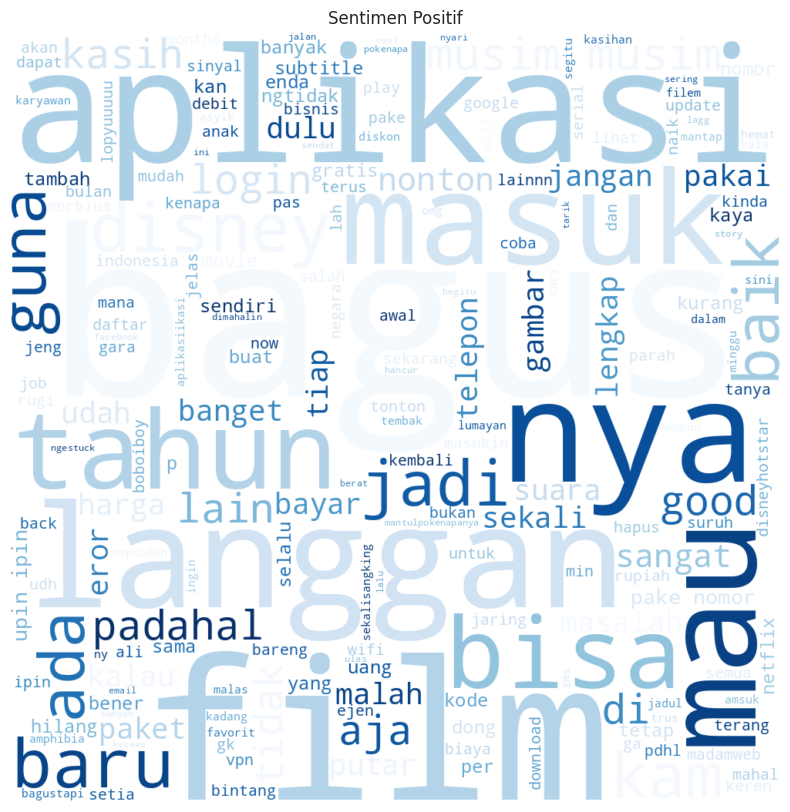

In [44]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [45]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    60
0    42
Name: count, dtype: int64

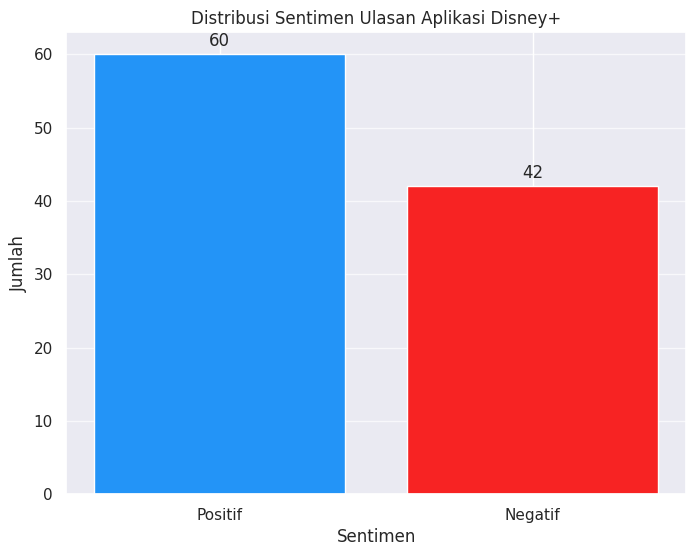

In [46]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Disney+")

# **Data Preparation**

In [47]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [49]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [50]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

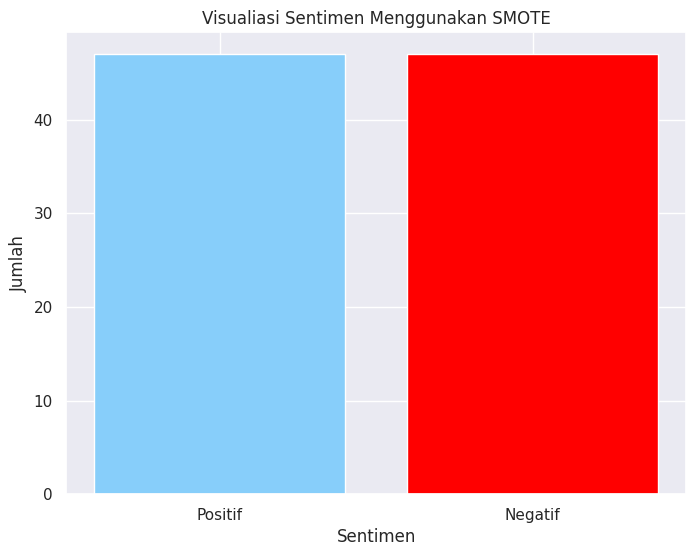

In [51]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

# **Modeling**


In [52]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [53]:
y_pred = naive_bayes.predict(X_test_vec)

In [54]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.47619047619047616

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.29      0.25      0.27         8
     Positif       0.57      0.62      0.59        13

    accuracy                           0.48        21
   macro avg       0.43      0.43      0.43        21
weighted avg       0.46      0.48      0.47        21



In [55]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])  # Assuming positive class is at index 0

print('\nTrue Negatives (TN) = ', cm[1, 1])  # Assuming negative class is at index 1

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[2 6]
 [5 8]]

True Positives (TP) =  2

True Negatives (TN) =  8

False Positives (FP) =  6

False Negatives (FN) =  5

Accuracy =  0.47619047619047616


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

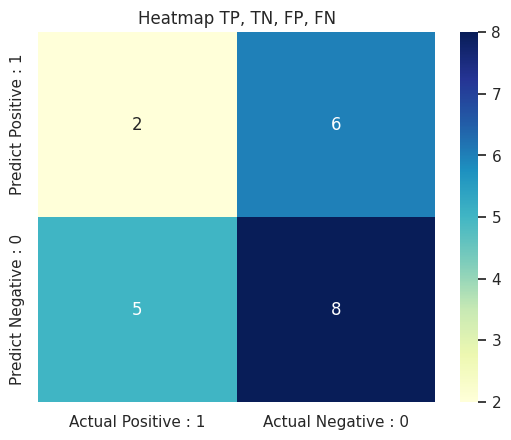

In [56]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive : 1', 'Actual Negative : 0'],
                                 index=['Predict Positive : 1', 'Predict Negative : 0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [57]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [58]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.4762


In [59]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.5238


# **Testing**


In [60]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : jelek
Hasil Analisis Sentimen Untuk Teks Baru : Negatif


In [61]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : bagus
Hasil Analisis Sentimen Untuk Teks Baru : Positif
